In [1]:
from main_rng import *
import pandas as pd
import matplotlib.pyplot as plt

Pojedyncze realizacje (do animacji)

p = 0.3, intensywność=20

In [2]:
n = 1
cap = pd.read_csv('inputs/capacties_estimated.csv')
trip_ids = pd.read_csv('inputs/generated_trip.csv')
trains = [pd.read_csv(f'inputs/routes/{trip_ids.iloc[i][0]}.csv') for i in range(len(trip_ids))]
## prawdopodobieństwo 0.3, intensywność 20
A = TrainSimulationRNG(trains, n, cap, 0.3, 20)

C:\Users\olkar\AppData\Local\Temp\ipykernel_25264\3562952717.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trains = [pd.read_csv(f'inputs/routes/{trip_ids.iloc[i][0]}.csv') for i in range(len(trip_ids))]
C:\Users\olkar\AppData\Local\Temp\ipykernel_25264\3562952717.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trains = [pd.read_csv(f'inputs/routes/{trip_ids.iloc[i][0]}.csv') for i in range(len(trip_ids))]
C:\Users\olkar\AppData\Local\Temp\ipykernel_25264\3562952717.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as l

In [65]:
A.simulation()

In [66]:
summed_delays = np.sum(np.array(A.delay), axis=0)
summed_delays_random = np.sum(np.array(A.direct_random), axis=0)

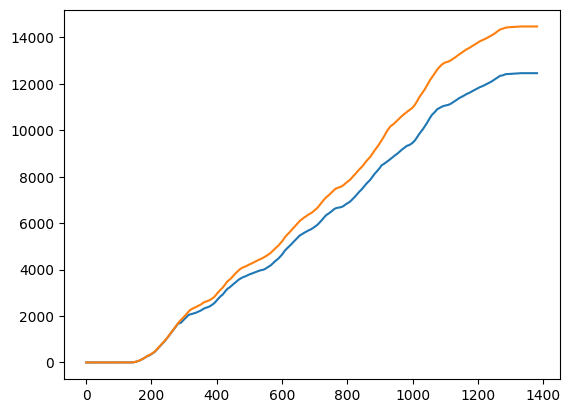

In [67]:
plt.plot(summed_delays_random) #spowodowane bezpośrednio przez losowe opóźnienia
plt.plot(summed_delays) #wszystkie (czylie też te pośrednio spowodowane przez opóźnienia innych pociągów)

(array([240.,  71.,  35.,  36.,  21.,   5.,  10.,   3.,   1.,   2.]),
 array([  0. ,  23.8,  47.6,  71.4,  95.2, 119. , 142.8, 166.6, 190.4,
        214.2, 238. ]),
 <BarContainer object of 10 artists>)

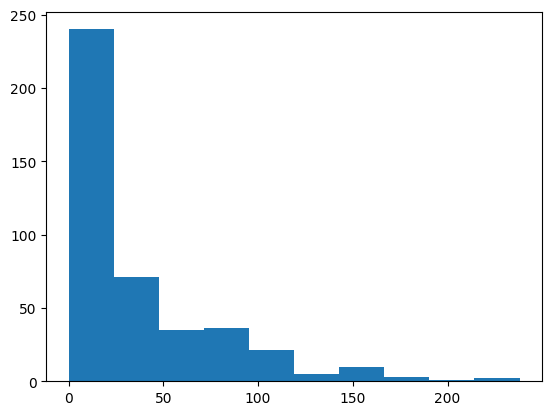

In [68]:
plt.hist(np.array(A.delay)[:,-1])

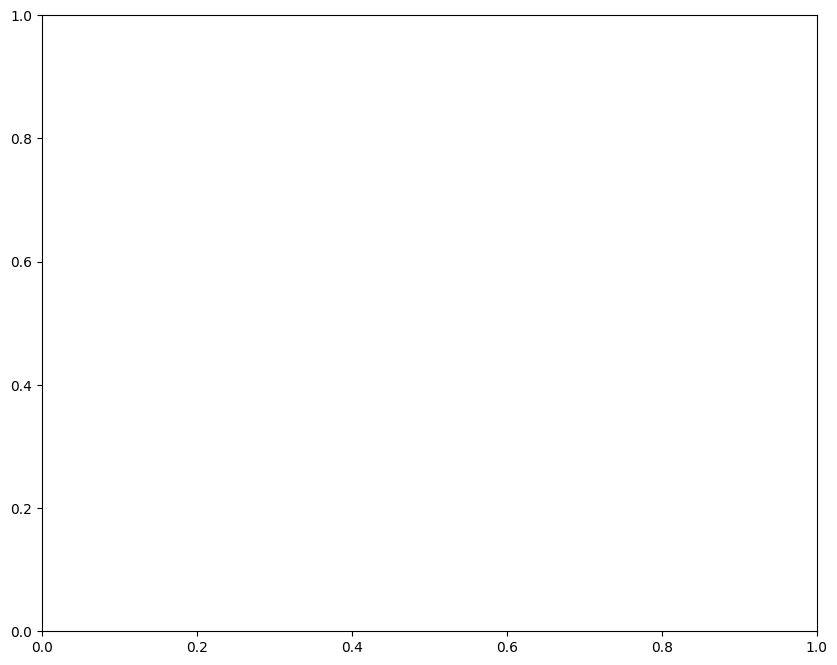

In [69]:
B = create_anim(A,pd.read_csv('inputs/stops_io.txt'),pd.read_csv('inputs/id_capacities.csv'))

In [70]:
save_anim(B.animate())

MovieWriter imagemagick unavailable; using Pillow instead.


p=0.2, intensywnosc=90

In [22]:
A = TrainSimulationRNG(trains, n, cap, 0.05, 90)

In [23]:
A.simulation()
summed_delays = np.sum(np.array(A.delay), axis=0)
summed_delays_random = np.sum(np.array(A.direct_random), axis=0)

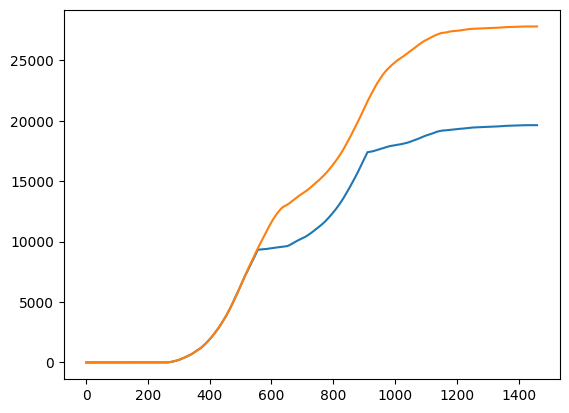

In [24]:
plt.plot(summed_delays_random) #spowodowane bezpośrednio przez losowe opóźnienia
plt.plot(summed_delays) #wszystkie (czylie też te pośrednio spowodowane przez opóźnienia innych pociągów)

(array([283.,  37.,  27.,  24.,  17.,  22.,   7.,   2.,   2.,   3.]),
 array([  0. ,  51.2, 102.4, 153.6, 204.8, 256. , 307.2, 358.4, 409.6,
        460.8, 512. ]),
 <BarContainer object of 10 artists>)

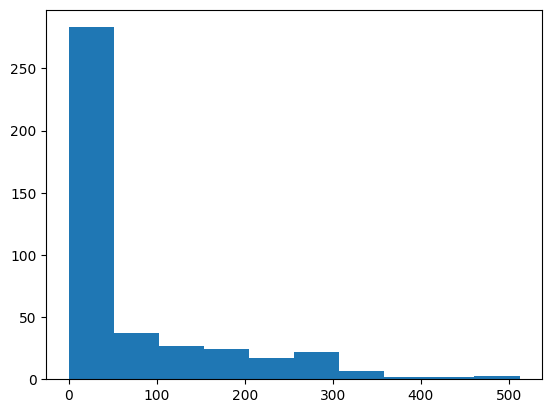

In [25]:
plt.hist(np.array(A.delay)[:,-1])

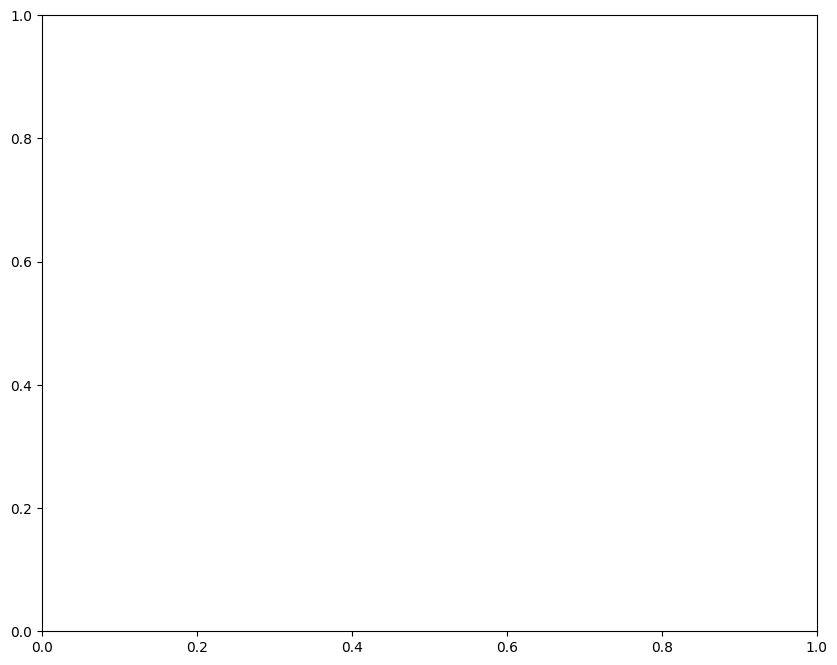

In [26]:
B = create_anim(A,pd.read_csv('inputs/stops_io.txt'),pd.read_csv('inputs/id_capacities.csv'))

In [27]:
save_anim(B.animate())

MovieWriter imagemagick unavailable; using Pillow instead.


**Monte Casino**

In [28]:
A = TrainSimulationRNG(trains, n, cap, 0.3, 20)

In [29]:
N = 1000
delay_times = [None for i in range(N)]
delay_random = [None for i in range(N)]
summed_delays = [None for i in range(N)]
summed_delays_random = [None for i in range(N)]
for i in range(N):
    A.simulation()
    delay_times[i] = A.delay
    delay_random[i] = A.direct_random
    summed_delays[i] = np.sum(np.array(delay_times[i]), axis=0).tolist()
    summed_delays_random[i] = np.sum(np.array(delay_random[i]), axis=0).tolist()
    print(f'symulacja {i}')

symulacja 0
symulacja 1
symulacja 2
symulacja 3
symulacja 4
symulacja 5
symulacja 6
symulacja 7
symulacja 8
symulacja 9
symulacja 10
symulacja 11
symulacja 12
symulacja 13
symulacja 14
symulacja 15
symulacja 16
symulacja 17
symulacja 18
symulacja 19
symulacja 20
symulacja 21
symulacja 22
symulacja 23
symulacja 24
symulacja 25
symulacja 26
symulacja 27
symulacja 28
symulacja 29
symulacja 30
symulacja 31
symulacja 32
symulacja 33
symulacja 34
symulacja 35
symulacja 36
symulacja 37
symulacja 38
symulacja 39
symulacja 40
symulacja 41
symulacja 42
symulacja 43
symulacja 44
symulacja 45
symulacja 46
symulacja 47
symulacja 48
symulacja 49
symulacja 50
symulacja 51
symulacja 52
symulacja 53
symulacja 54
symulacja 55
symulacja 56
symulacja 57
symulacja 58
symulacja 59
symulacja 60
symulacja 61
symulacja 62
symulacja 63
symulacja 64
symulacja 65
symulacja 66
symulacja 67
symulacja 68
symulacja 69
symulacja 70
symulacja 71
symulacja 72
symulacja 73
symulacja 74
symulacja 75
symulacja 76
symulacja

In [ ]:
adjust_length(summed_delays)
adjust_length(summed_delays_random)

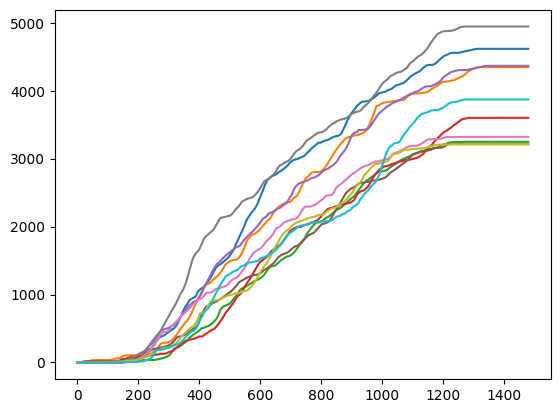

In [ ]:
for i in range(10):
    plt.plot(summed_delays[i])

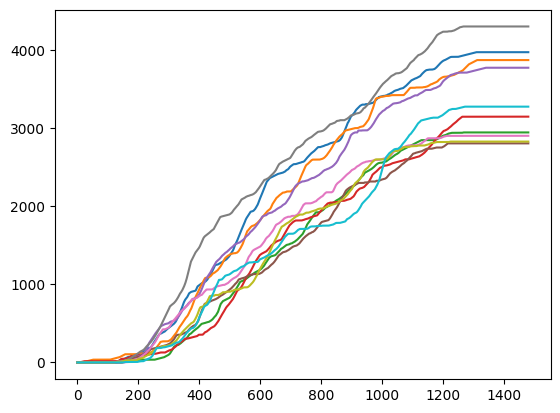

In [ ]:
for i in range(10):
    plt.plot(summed_delays_random[i])

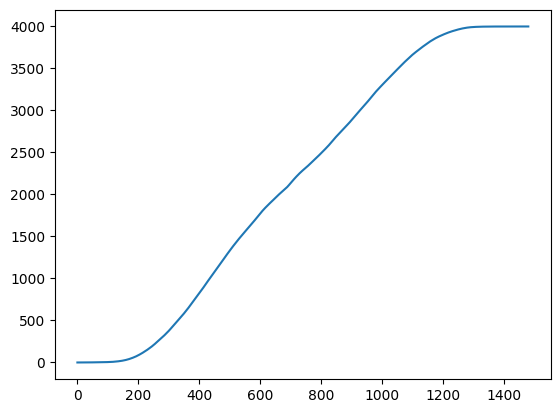

In [ ]:
plt.plot(np.mean(np.array(summed_delays), axis=0))

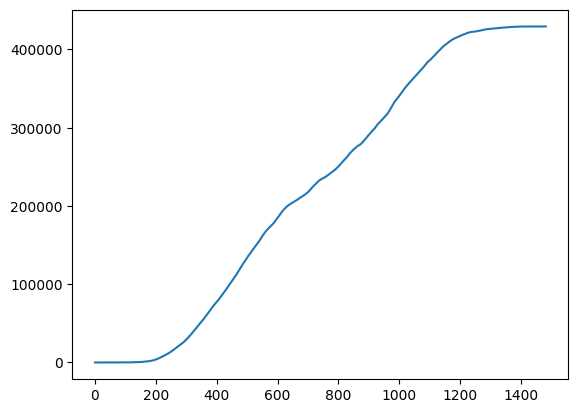

In [ ]:
plt.plot(np.var(np.array(summed_delays), axis=0))

(0.0, 350.0)

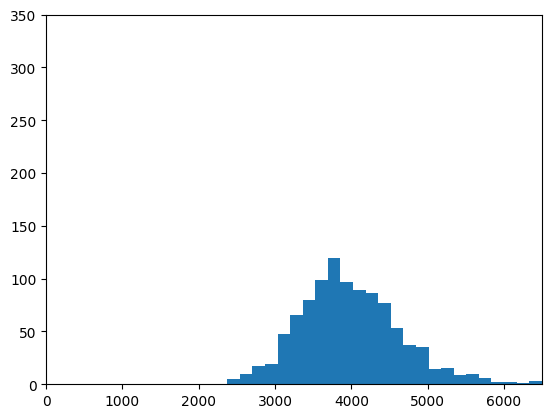

In [ ]:
plt.hist(np.array(summed_delays)[:,1300], bins=25) #tego gif byłby idealny
plt.xlim((0, 6500))
plt.ylim((0,350))

In [ ]:
x_max = max(max(np.array(summed_delays)[:,i]) for i in range(len(summed_delays)))
print(x_max)

5898


MovieWriter imagemagick unavailable; using Pillow instead.


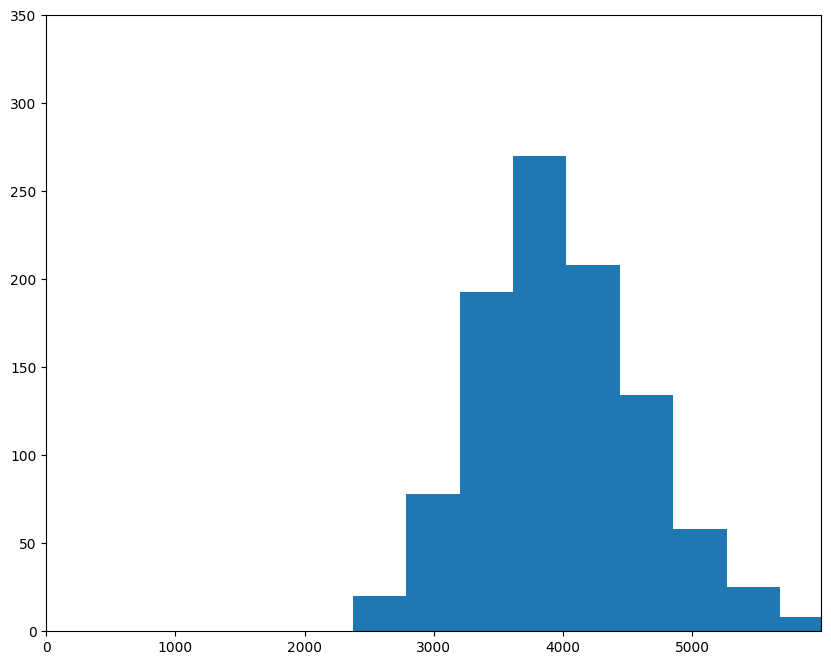

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

def hist_plotstep(step, ax):
    ax.clear()
    ax.hist(np.array(summed_delays)[:,step]) #tego gif byłby idealny
    ax.set_xlim((0, x_max+100))
    ax.set_ylim((0,350))
    
def hist_anim():
    animation = FuncAnimation(fig, hist_plotstep, fargs=(ax,), frames=int(len(summed_delays[0])), interval=10, repeat=False)
    return animation
def save_anim(animation: FuncAnimation,name='animhist.gif',fps=30) -> None:
    animation.save(f'outputs/{name}', writer='imagemagick', fps=fps,dpi=100)

save_anim(hist_anim())